# **Indian Food Dataset**

Known for its aromatic spices, bold flavors, and regional specialties, Indian food is a delightful journey for the taste buds. From the tandoori delights of the North to the coconut-infused dishes of the South, each region offers a unique culinary experience. Indian cuisine not only caters to various palates but also holds a significant place in Indian traditions and celebrations.

name - Name of the dish.

ingredients - Ingredients used in the dish.

diet - Vegetarian/NonVegetarian.

prep_time - Time consumed in preparation of the dish.

cook_time - Time consumed in cooking the dish.

flavor_profile - Sweet/Spicy/other flavor profile.

course - Main Course/ Dessert /Starters.

state - Indian State where the dish originated.

region - Region in which the dish originated.

img_url - URL for the image of dish.

In [1]:
from google.colab import drive

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from scipy.stats import mstats

In [3]:
food_data = pd.read_csv('/content/drive/MyDrive/Ifood_new.csv')
pd.options.display.max_rows = 9999

In [4]:
food_data.shape

(255, 10)

In [5]:
food_data.columns

Index(['name', 'ingredients', 'diet', 'prep_time', 'cook_time',
       'flavor_profile', 'course', 'state', 'region', 'img_url'],
      dtype='object')

In [6]:
food_data.isna().sum()

,0
name,0
ingredients,0
diet,0
prep_time,0
cook_time,0
flavor_profile,0
course,0
state,0
region,1
img_url,1


In [7]:
food_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
 9   img_url         254 non-null    object
dtypes: int64(2), object(8)
memory usage: 20.0+ KB


In [8]:
food_data.describe()

,prep_time,cook_time
count,255.000000,255.000000
mean,31.105882,34.529412
std,72.554409,48.265650
min,-1.000000,-1.000000
25%,10.000000,20.000000
50%,10.000000,30.000000
75%,20.000000,40.000000
max,500.000000,720.000000


In [9]:
food_data.head(10)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,img_url
0,Adhirasam,"Rice flour, jaggery, ghee, vegetable oil, elachi",vegetarian,10,50,sweet,dessert,West Bengal,East,https://www.crazymasalafood.com/wp-content/ima...
1,Aloo gobi,"Cauliflower, potato, garam masala, turmeric, c...",vegetarian,10,20,spicy,main course,Punjab,North,https://www.vegrecipesofindia.com/wp-content/u...
2,Aloo matar,"Potato, peas, chillies, ginger, garam masala, ...",vegetarian,5,40,spicy,main course,Punjab,North,https://www.vegrecipesofindia.com/wp-content/u...
3,Aloo methi,"Potato, fenugreek leaves, chillies, salt, oil",vegetarian,10,40,bitter,main course,Punjab,North,https://www.vegrecipesofindia.com/wp-content/u...
4,Aloo shimla mirch,"Potato, shimla mirch, garam masala, amchur pow...",vegetarian,10,40,spicy,main course,Punjab,North,https://www.vegrecipesofindia.com/wp-content/u...
5,Aloo tikki,"Rice flour, potato, bread crumbs, garam masala...",vegetarian,5,20,spicy,main course,Punjab,North,https://www.vegrecipesofindia.com/wp-content/u...
6,Alu Pitika,"Potatoes, mustard oil, fish, green chillies",non vegetarian,5,20,spicy,main course,Assam,North East,https://www.pepperonpizza.com/wp-content/uploa...
7,Amti,"Kala masala, arhar dal, curry leaves, mustard ...",vegetarian,10,45,spicy,main course,Maharashtra,West,https://www.vegrecipesofindia.com/wp-content/u...
8,Anarsa,"Rice flour, jaggery, khus-khus seeds",vegetarian,10,50,sweet,dessert,Maharashtra,West,https://www.crazymasalafood.com/wp-content/ima...
9,Ariselu,"Rice flour, jaggery, ghee",vegetarian,15,75,sweet,dessert,Andhra Pradesh,South,https://www.crazymasalafood.com/wp-content/ima...


In [10]:
data1 = food_data[(food_data['img_url'].isnull()) | (food_data['region'].isnull())]
data1

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,img_url
95,Kajjikaya,"Rice flour, jaggery, coconut",vegetarian,40,15,sweet,dessert,Andhra Pradesh,South,NaN
177,Panjeeri,"Whole wheat flour, musk melon seeds, poppy see...",vegetarian,10,25,sweet,dessert,Uttar Pradesh,NaN,https://i0.wp.com/fatimacooks.net/wp-content/u...


In [11]:
food_data['img_url'] = food_data['img_url'].fillna('https://mirchi.com/os/cdn/content/images/kajjikayalu%20bellam%20athithigruha%20foods_medium_0272585.webp')
food_data['region'] = food_data['region'].fillna('North')

In [12]:
null_data = food_data[food_data.isnull()].sum()
null_data

,0
name,0
ingredients,0
diet,0
prep_time,0.0
cook_time,0.0
flavor_profile,0
course,0
state,0
region,0
img_url,0


In [13]:
food_data['state'].value_counts()

,count
state,
Gujarat,35
Punjab,33
Maharashtra,30
West Bengal,24
-1,24
Assam,21
Tamil Nadu,20
Andhra Pradesh,10
Uttar Pradesh,9


In [14]:
food_data['region'].value_counts()

,count
region,
West,73
South,58
North,51
East,32
North East,25
-1,13
Central,3


In [15]:
filtered_df = food_data[food_data['state'] == '-1']
filtered_df

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,img_url
29,Brown Rice,"Brown rice, soy sauce, olive oil",vegetarian,15,25,-1,main course,-1,-1,https://upload.wikimedia.org/wikipedia/commons...
65,Dosa,"Chana dal, urad dal, whole urad dal, blend ric...",vegetarian,360,90,spicy,snack,-1,South,https://www.archanaskitchen.com/images/archana...
86,Idli,"Split urad dal, urad dal, idli rice, thick poh...",vegetarian,360,90,spicy,snack,-1,South,https://www.archanaskitchen.com/images/archana...
96,Kaju katli,"Cashews, ghee, cardamom, sugar",vegetarian,10,20,sweet,dessert,-1,-1,https://crazymasalafood.com/wp-content/images/...
111,Kheer,"Milk, rice, sugar, dried fruits",vegetarian,10,40,sweet,dessert,-1,-1,https://www.crazymasalafood.com/wp-content/ima...
113,Khichdi,"Moong dal, green peas, ginger, tomato, green c...",vegetarian,40,20,spicy,main course,-1,-1,https://www.vegrecipesofindia.com/wp-content/u...
127,Kulfi falooda,"Rose syrup, falooda sev, mixed nuts, saffron, ...",vegetarian,45,25,sweet,dessert,-1,-1,https://crazymasalafood.com/wp-content/images/...
134,Laddu,"Gram flour, ghee, sugar",vegetarian,10,40,sweet,dessert,-1,-1,https://crazymasalafood.com/wp-content/images/...
137,Lauki ki subji,"Bottle gourd, coconut oil, garam masala, ginge...",vegetarian,10,20,spicy,main course,-1,-1,https://www.vegrecipesofindia.com/wp-content/u...
148,Masala Dosa,"Chana dal, urad dal, potatoes, idli rice, thic...",vegetarian,360,90,spicy,snack,-1,South,https://www.archanaskitchen.com/images/archana...


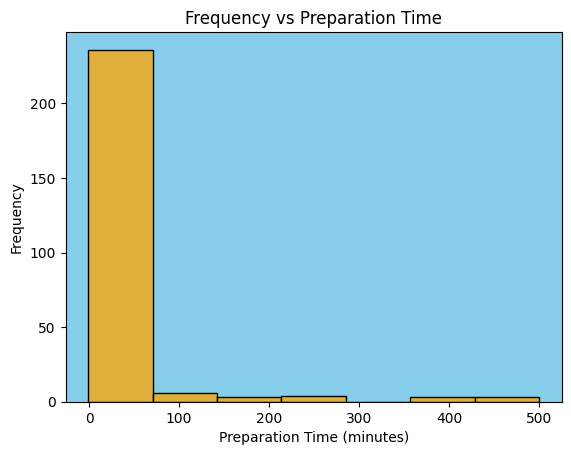

In [16]:
sns.histplot(data = food_data['prep_time'] , bins = 7 , edgecolor = 'black', color = 'orange')
plt.xlabel('Preparation Time (minutes)')
plt.ylabel('Frequency')
plt.title('Frequency vs Preparation Time')
plt.gca().set_facecolor('skyblue')
plt.show()

In [17]:
food_data['course'].value_counts()

,count
course,
main course,129
dessert,85
snack,39
starter,2


In [18]:
food_data['flavor_profile'].value_counts()

,count
flavor_profile,
spicy,133
sweet,88
-1,29
bitter,4
sour,1


In [19]:
food_data['prep_time'].value_counts()

,count
prep_time,
10,98
20,40
-1,30
15,22
5,16
30,12
25,5
120,5
45,5


In [20]:
food_data['cook_time'].value_counts()

,count
cook_time,
30,59
20,42
-1,28
40,27
60,22
45,15
25,13
50,10
35,9


In [21]:
food_data.loc[(food_data['state'] == '-1') & (food_data['name'] == 'Pachadi'), 'state'] = 'Andhra Pradesh'
food_data.loc[(food_data['state'] == '-1') & (food_data['region'] == 'South'), 'state'] = 'Tamil Nadu'
food_data.loc[(food_data['state'] == '-1') & (food_data['region'] == '-1'), ['state', 'region']] = ['Rajasthan', 'North']
food_data.loc[(food_data['state'] == '-1') & (food_data['region'] == 'North') , 'state'] = 'Punjab'
food_data.loc[(food_data['course'] == '-1') | (food_data['flavor_profile'] == '-1'), ['course' , 'flavor_profile']] = ['Not in the list' , 'Not in the list']
food_data.loc[(food_data['prep_time'] == -1.0) | (food_data['cook_time'] == -1.0) ,['prep_time', 'cook_time']] = [int(food_data['prep_time'].median()) , int(food_data['cook_time'].median())]
food_data

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,img_url
0,Adhirasam,"Rice flour, jaggery, ghee, vegetable oil, elachi",vegetarian,10,50,sweet,dessert,West Bengal,East,https://www.crazymasalafood.com/wp-content/ima...
1,Aloo gobi,"Cauliflower, potato, garam masala, turmeric, c...",vegetarian,10,20,spicy,main course,Punjab,North,https://www.vegrecipesofindia.com/wp-content/u...
2,Aloo matar,"Potato, peas, chillies, ginger, garam masala, ...",vegetarian,5,40,spicy,main course,Punjab,North,https://www.vegrecipesofindia.com/wp-content/u...
3,Aloo methi,"Potato, fenugreek leaves, chillies, salt, oil",vegetarian,10,40,bitter,main course,Punjab,North,https://www.vegrecipesofindia.com/wp-content/u...
4,Aloo shimla mirch,"Potato, shimla mirch, garam masala, amchur pow...",vegetarian,10,40,spicy,main course,Punjab,North,https://www.vegrecipesofindia.com/wp-content/u...
5,Aloo tikki,"Rice flour, potato, bread crumbs, garam masala...",vegetarian,5,20,spicy,main course,Punjab,North,https://www.vegrecipesofindia.com/wp-content/u...
6,Alu Pitika,"Potatoes, mustard oil, fish, green chillies",non vegetarian,5,20,spicy,main course,Assam,North East,https://www.pepperonpizza.com/wp-content/uploa...
7,Amti,"Kala masala, arhar dal, curry leaves, mustard ...",vegetarian,10,45,spicy,main course,Maharashtra,West,https://www.vegrecipesofindia.com/wp-content/u...
8,Anarsa,"Rice flour, jaggery, khus-khus seeds",vegetarian,10,50,sweet,dessert,Maharashtra,West,https://www.crazymasalafood.com/wp-content/ima...
9,Ariselu,"Rice flour, jaggery, ghee",vegetarian,15,75,sweet,dessert,Andhra Pradesh,South,https://www.crazymasalafood.com/wp-content/ima...


<Axes: ylabel='prep_time'>

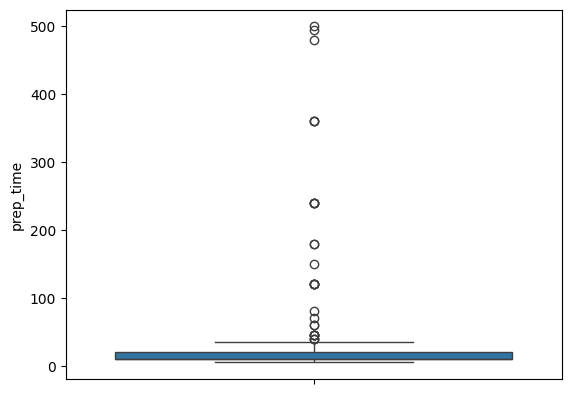

In [22]:
sns.boxplot(food_data['prep_time'])

<Axes: ylabel='cook_time'>

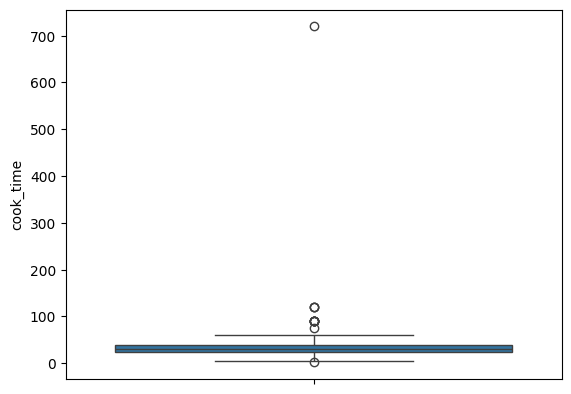

In [23]:
sns.boxplot(food_data['cook_time'])

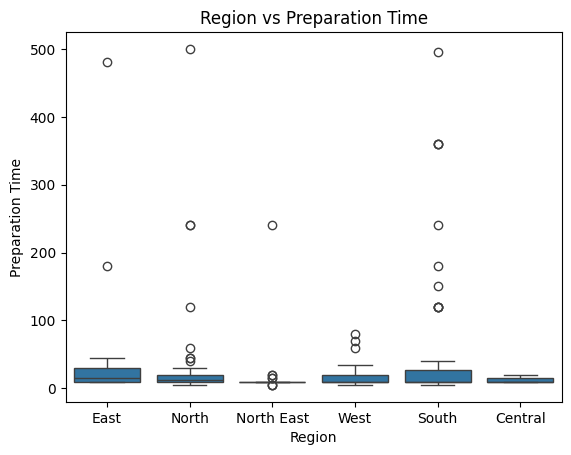

In [24]:
sns.boxplot(data = food_data , x = 'region' , y = 'prep_time')
plt.title('Region vs Preparation Time')
plt.xlabel('Region')
plt.ylabel('Preparation Time')
plt.show()

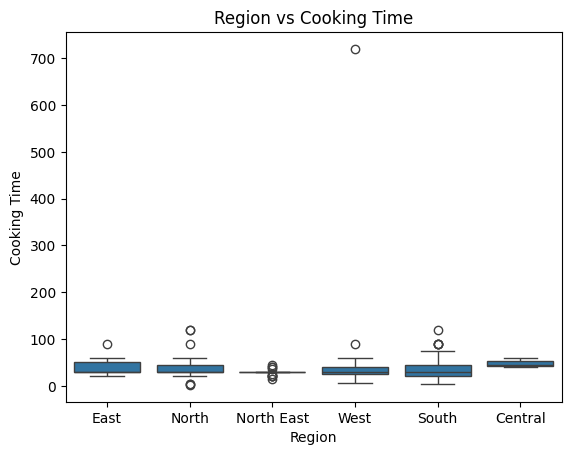

In [25]:
sns.boxplot(data = food_data , x = 'region' , y = 'cook_time' )
plt.title('Region vs Cooking Time')
plt.xlabel('Region')
plt.ylabel('Cooking Time')
plt.show()

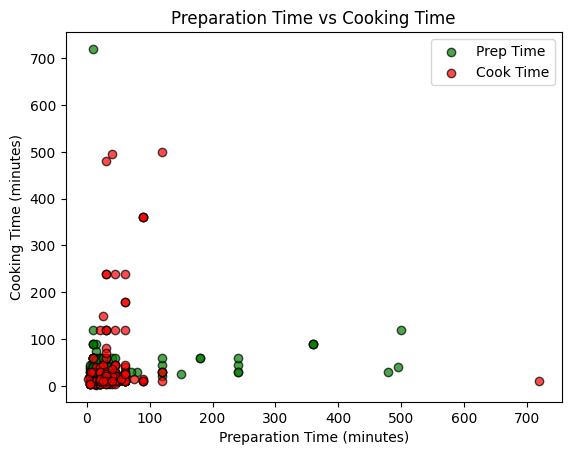

In [26]:
plt.scatter(food_data['prep_time'], food_data['cook_time'], c='g', alpha=0.7, edgecolor='black', label='Prep Time')
plt.scatter(food_data['cook_time'], food_data['prep_time'], c='r', alpha=0.7, edgecolor='black', label='Cook Time')
plt.xlabel('Preparation Time (minutes)')
plt.ylabel('Cooking Time (minutes)')
plt.title('Preparation Time vs Cooking Time')
plt.legend()
plt.show()

In [27]:
food_data['prep_time'] = mstats.winsorize(food_data['prep_time'], limits = [0.05, 0.12])
food_data['cook_time'] = mstats.winsorize(food_data['cook_time'], limits = [0.05,0.05])

<Axes: ylabel='prep_time'>

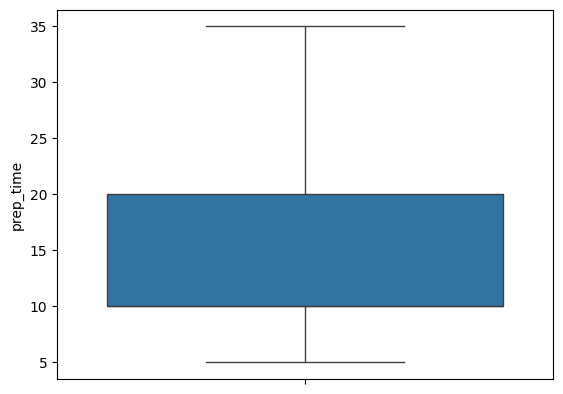

In [28]:
sns.boxplot(food_data['prep_time'])

<Axes: ylabel='cook_time'>

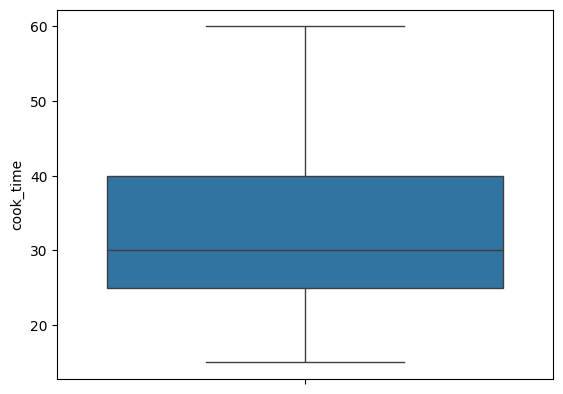

In [29]:
sns.boxplot(food_data['cook_time'])

In [30]:
food_data['diet'].value_counts()

,count
diet,
vegetarian,227
non vegetarian,28


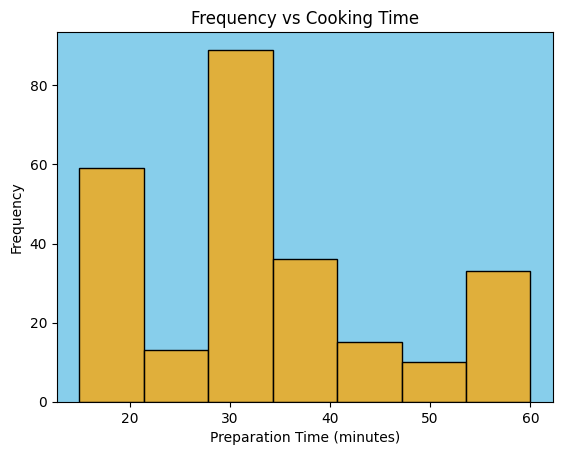

In [31]:
sns.histplot(data = food_data['cook_time'] , bins = 7 , edgecolor = 'black', color = 'orange')
plt.xlabel('Preparation Time (minutes)')
plt.ylabel('Frequency')
plt.title('Frequency vs Cooking Time')
plt.gca().set_facecolor('skyblue')
plt.show()

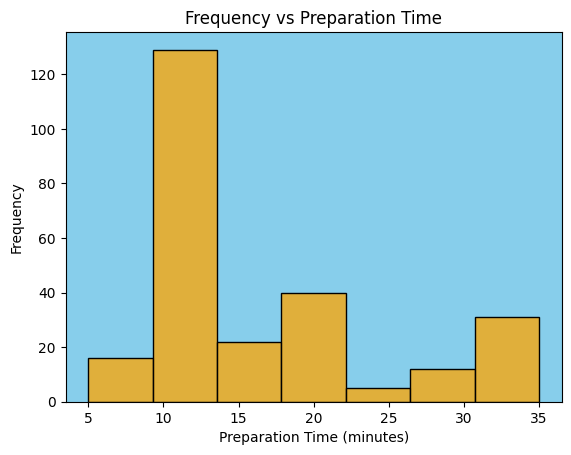

In [32]:
sns.histplot(data = food_data['prep_time'] , bins = 7 , edgecolor = 'black', color = 'orange')
plt.xlabel('Preparation Time (minutes)')
plt.ylabel('Frequency')
plt.title('Frequency vs Preparation Time')
plt.gca().set_facecolor('skyblue')
plt.show()

In [33]:
calculation = food_data['diet'].value_counts()
new_dataframe = calculation.reset_index()
new_dataframe.columns = ['diet' , 'count']
new_dataframe

,diet,count
0,vegetarian,227
1,non vegetarian,28


Text(0, 0.5, 'Region')

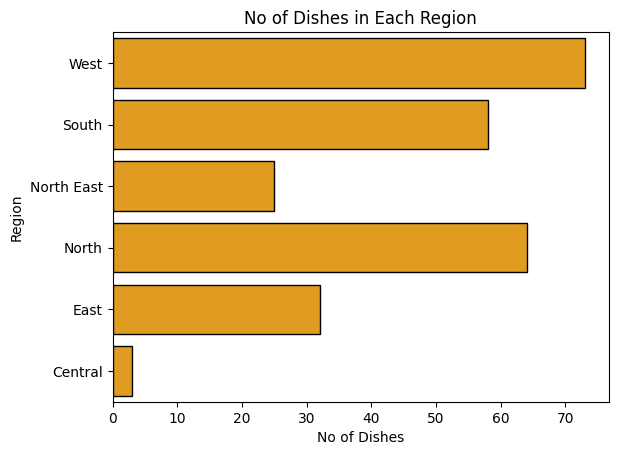

In [34]:
no_of_dishes = food_data.groupby('region')['name'].nunique().reset_index()
no_of_dishes = no_of_dishes.sort_values(by='region', ascending=False)
sns.barplot(data = no_of_dishes , y = 'region' , x = 'name' , color = 'orange' , edgecolor = 'black')
plt.title('No of Dishes in Each Region')
plt.xlabel('No of Dishes')
plt.ylabel("Region")

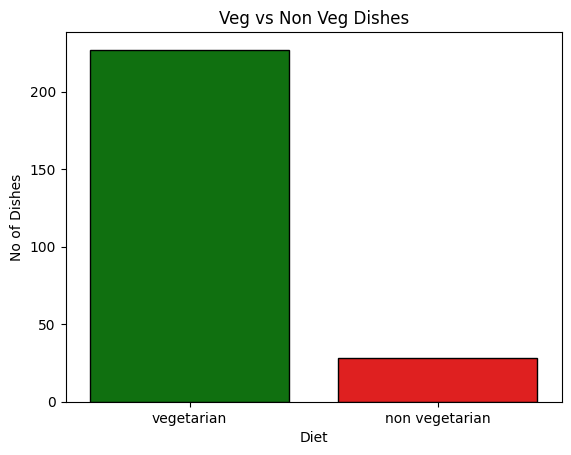

In [35]:
color = {'vegetarian' : 'green' , 'non vegetarian' : 'red'}
sns.barplot(data = new_dataframe, x = "diet" , y = "count" , hue = "diet" , palette = color ,edgecolor = 'black' )
plt.title('Veg vs Non Veg Dishes')
plt.xlabel('Diet')
plt.ylabel('No of Dishes')
plt.show()

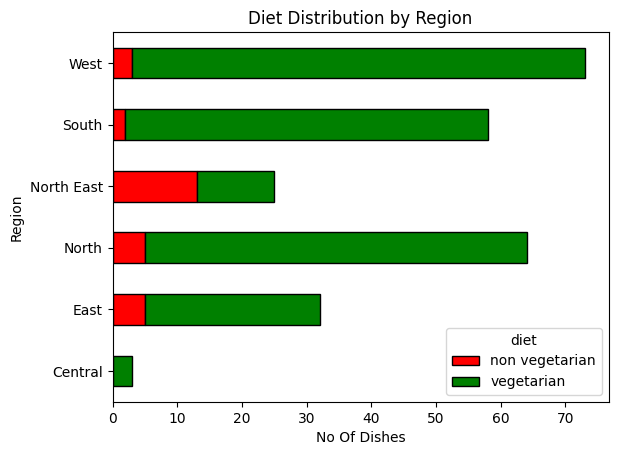

diet,non vegetarian,vegetarian
region,,
Central,NaN,3.0
East,5.0,27.0
North,5.0,59.0
North East,13.0,12.0
South,2.0,56.0
West,3.0,70.0


In [36]:
grouped_data = food_data.groupby(['region' , 'diet'])['name'].count().reset_index()
grouped_data = grouped_data.sort_values(by = 'region')
grouped_data['name'] = grouped_data['name'].fillna(0)
pivot_data = grouped_data.pivot(index = 'region', columns = 'diet' , values = 'name')
pivot_data.plot(kind='barh', stacked=True , color = color , edgecolor = 'black')
plt.xlabel('No Of Dishes')
plt.ylabel('Region')
plt.title('Diet Distribution by Region')
plt.show()
pivot_data

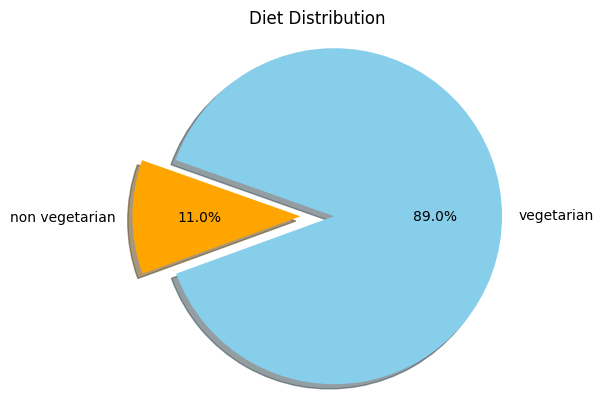

In [37]:
explode = (0, 0.2)
colors = [ 'skyblue' , 'orange']
data1 = food_data['diet'].value_counts()
plt.pie(data1, labels = data1.index, autopct='%1.1f%%', startangle=200, shadow=True, explode=explode, colors=colors)
plt.title('Diet Distribution')
plt.axis('equal')
plt.show()

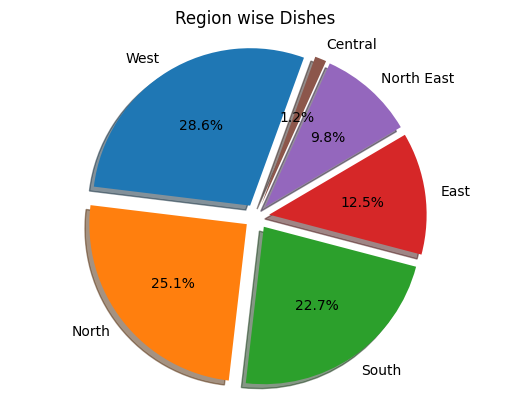

In [38]:
data3 = food_data['region'].value_counts()
pie_data = data3.values
explode1 = [0]*len(data3)
for i in range(len(explode1)):
  explode1[i] = 0.08
plt.pie(pie_data , labels=data3.index, autopct='%1.1f%%', startangle= 70 , shadow = True , explode = explode1 )
plt.title('Region wise Dishes ')
plt.axis('equal')
plt.show()


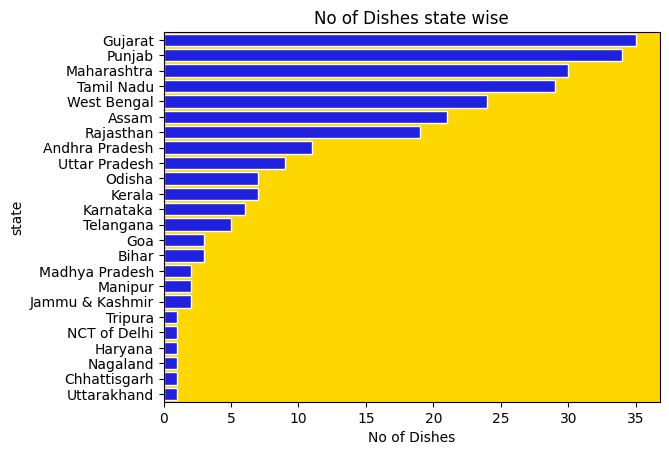

In [39]:
state = pd.DataFrame(food_data['state'].value_counts())
state_count = state.reset_index()
state_count.columns = ['state' , 'count']
sns.barplot(data = state_count , x = 'count' , y = 'state', color = 'blue' , edgecolor = 'white')
plt.xlabel('No of Dishes')
plt.ylabel('state')
plt.title('No of Dishes state wise')
plt.gca().set_facecolor("gold")

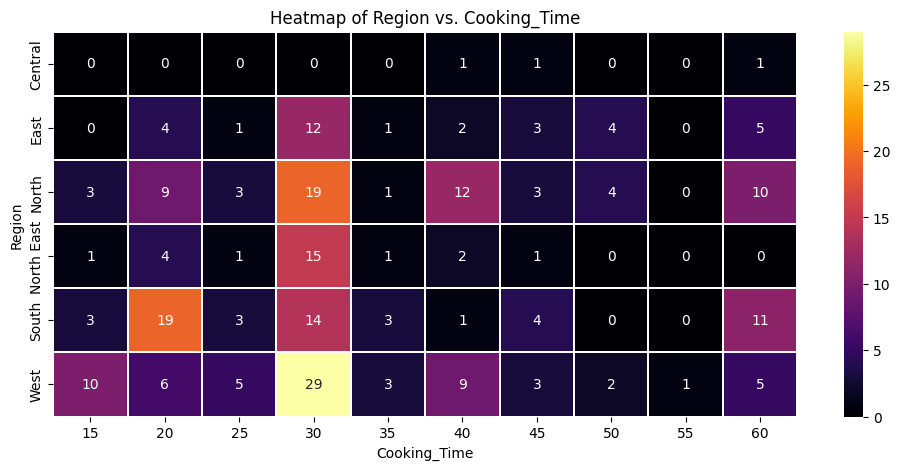

In [40]:
region_diet_counts = pd.crosstab(food_data['region'], food_data['cook_time'])
plt.figure(figsize=(12, 5))
sns.heatmap(region_diet_counts, annot= True, cmap='inferno', fmt='d', linewidths=.2)
plt.title('Heatmap of Region vs. Cooking_Time')
plt.xlabel('Cooking_Time')
plt.ylabel('Region')
plt.show()

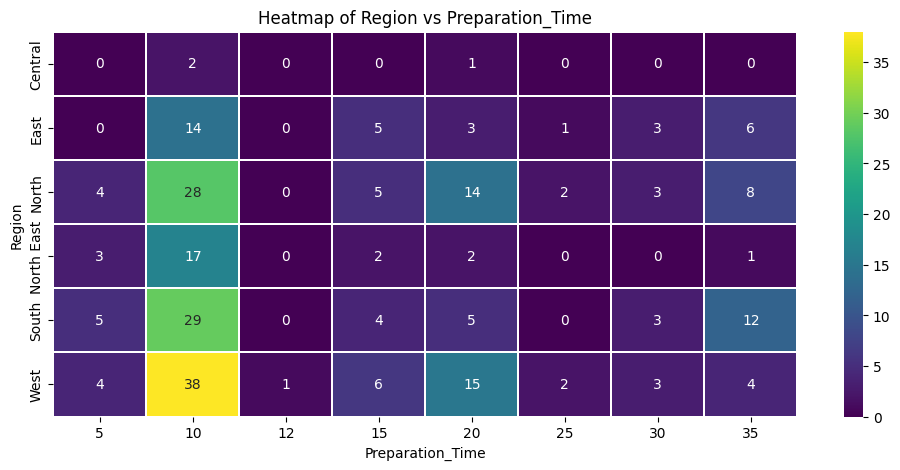

In [41]:
region_diet_counts1 = pd.crosstab(food_data['region'], food_data['prep_time'])
plt.figure(figsize=(12, 5))
sns.heatmap(region_diet_counts1, annot= True, cmap='viridis', fmt='d', linewidths=.2)
plt.title('Heatmap of Region vs Preparation_Time')
plt.xlabel('Preparation_Time')
plt.ylabel('Region')
plt.show()

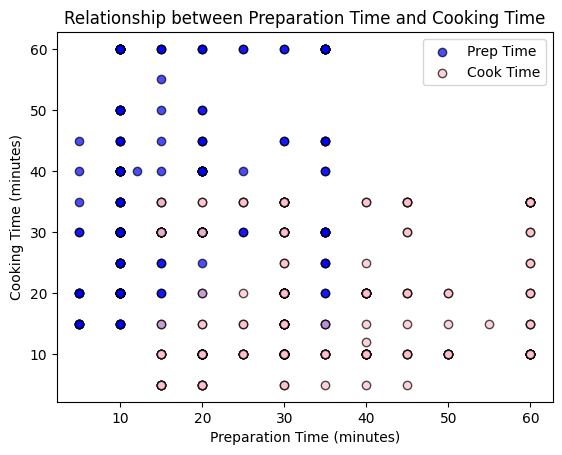

In [42]:
plt.scatter(food_data['prep_time'], food_data['cook_time'], c='blue', alpha=0.7, edgecolor='black', label='Prep Time')
plt.scatter(food_data['cook_time'], food_data['prep_time'], c='pink', alpha=0.7, edgecolor='black', label='Cook Time')
plt.xlabel('Preparation Time (minutes)')
plt.ylabel('Cooking Time (minutes)')
plt.title('Relationship between Preparation Time and Cooking Time')
plt.legend()
plt.show()

In [43]:
#hey are you watching